# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt

#  Creación de la red

Creamos la red como una lista de enlaces, donde cada enlace tiene el atributo weight que indica que tan fuerte es la amistad en una escala de 1 a 3

In [2]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red

In [3]:
G = nx.Graph(lista_enlaces)

## Informacion de la red

### ACTIVIDAD 1
Cree una función imprime_informacion que imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [4]:
def imprime_informacion(G):
    n = len(nx.nodes(G))                 #Numero de nodos        
    m = len(nx.edges(G))                 # enlaces    
    d = nx.diameter(G)                   # diametro
    D = nx.density(G)                    #densidad
    print("Informacion de la red: \n- nodos\t\t= " + str(n) +
          "\n- enlaces\t= "   + str(m) +
          "\n- diámetro\t= "  + str(d) +
          "\n- densidad\t= "  + "{:.3f}".format(D))

Llama a la función para imprimir información

In [5]:
imprime_informacion(G)

Informacion de la red: 
- nodos		= 10
- enlaces	= 16
- diámetro	= 4
- densidad	= 0.356


## Dibujamos la red

### ACTIVIDAD 2
Cree una funcion grafica_red que gráfica la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica la red G y la guarda en un archivo png con el nombre almacenado en nombre_red. 

In [6]:
def grafica_red(G, nombre_red):
    nx.draw(G,with_labels=True,node_color="pink")
    plt.savefig(nombre_red+".png")

Llamamos a la función que gráfica la red

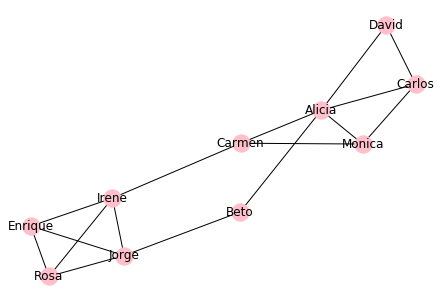

In [7]:
grafica_red(G, "amigos")

# Metricas de grado

## Distribucion de grados

### ACTIVIDAD 3
Cree una funcion grafica_distribucion_grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [8]:
def grafica_distribucion_grados(G, nombre_dg):
    DistGrados = nx.degree_histogram(G)                   #Lista de distribucion de grados
    print(DistGrados)
    plt.title("Distribución de grados:"+ nombre_dg)                   #Configuracion de titulo de grafica
    plt.ylabel('Número de nodos')                         #Configuracion de etiqueta de eje y
    plt.xlabel('Grado')                                   #Configuracion de etiqueta de eje X
    plt.plot(DistGrados)#plt.stem(DistGrados,use_line_collection = True)       #Graficado de grafica de distribucion, usando el argumento coleccion de linea
    plt.savefig("DisG"+nombre_dg + ".png")
    return DistGrados


Llama a la función para graficar las distribucion de grados

[0, 0, 2, 5, 2, 1]


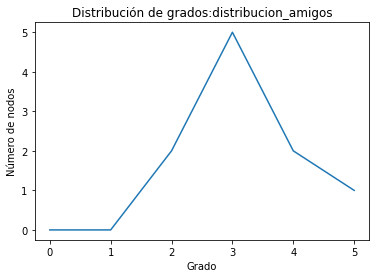

In [9]:
dist_grados = grafica_distribucion_grados(G, "distribucion_amigos")

## Grado promedio de la red

### ACTIVIDAD 4
Cree una función grado_promedio. Recibe la red G y su distribución de grados, imprime y devuelve el valor del grado promedio

In [10]:
def grado_promedio(G, dist_grados):
    SumaGrados = 0
    for i in range(0,len(dist_grados)):
        SumaGrados += i*dist_grados[i]                #Sumatoria de grado nodal de grafo, visitando cada elemento de la lista
                                                      #Suma el indice (grado nodal) * num. ocurrencia
    PromGrados = SumaGrados/len(nx.nodes(G))          #Calculo de promedio
    print("Grado promedio del grafo: "+ str(PromGrados))
    return PromGrados

Llama a la información para cálcular el grado promedio

In [11]:
grado_promedio(G, dist_grados)

Grado promedio del grafo: 3.2


3.2

## Mapa de calor para el grado nodal

La siguiente funcion que grafica el mapa de calor del grado nodal. Recibe la red G y la variable mapcalor_grado. Gráfica el mapa de calor del grado nodal de la red G. La gráfica la guarda en un archivo png con nombre almacenado en la variable mapcalor_grado

### ACTIVIDAD 5
Modifica el los colores del mapa de color, ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [12]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('jet')                                                        #Modificacion de mapa de calor
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    plt.title("Mapa de calor:"+ nombre_mcalor_grado)
    cbar.set_label('Grado')
    plt.savefig("MapaC"+nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

Llama a la función para gráficar el mapa de calor

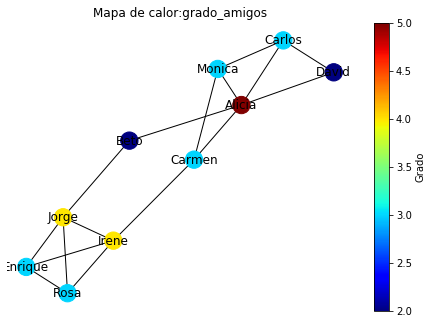

<Figure size 432x288 with 0 Axes>

In [13]:
mapa_calor_grado(G,"grado_amigos")

# Modelos de red

## Red completa
Creamos una red completa de 10 nodos

In [14]:
kn = nx.complete_graph(10)

Llama a la función para imprimir información

In [15]:
imprime_informacion(kn)

Informacion de la red: 
- nodos		= 10
- enlaces	= 45
- diámetro	= 1
- densidad	= 1.000


Llamamos a la función que gráfica la red

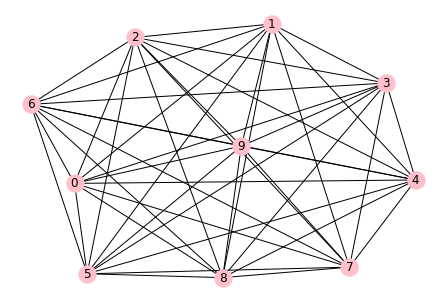

In [16]:
grafica_red(kn, "completa")

Llama a la función para graficar las distribucion de grados

[0, 0, 0, 0, 0, 0, 0, 0, 0, 10]


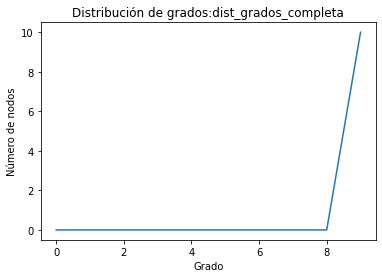

In [17]:
dist_grados = grafica_distribucion_grados(kn, "dist_grados_completa")

Llama a la información para cálcular el grado promedio

In [18]:
grado_promedio(kn, dist_grados)

Grado promedio del grafo: 9.0


9.0

Llama a la función para gráficar el mapa de calor

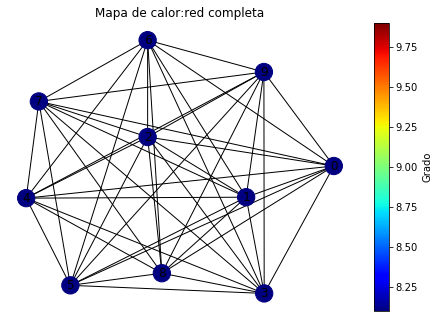

<Figure size 432x288 with 0 Axes>

In [19]:
mapa_calor_grado(kn,"red completa")

## Red aleatoria Barabasi-Albert
### ACTIVIDAD 6
Creamos una red aleatoria con el modelo Barabasi-Albert y con parámetros n=100 y m=5. Esto quiere decir que la red comienza con m=5 nodos y en cada iteracion se agrega un nuevo nodo que se conecta aletareamente m=5 nodos. El algoritmo termina cuando se tiene un total de n=100 nodos.

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

In [20]:
def CreaRedAleatoriaBarbAlb(n , m):
    Red = nx.barabasi_albert_graph(n, m, seed=None)
    return Red    

### ACTIVIDAD 7
Llama a la función para imprimir información de la red Barabasi-Albert

In [21]:
 RedAleatoria = CreaRedAleatoriaBarbAlb(100, 5)
 imprime_informacion(RedAleatoria)

Informacion de la red: 
- nodos		= 100
- enlaces	= 475
- diámetro	= 4
- densidad	= 0.096


### ACTIVIDAD 8
Llamamos a la función que gráfica la red Barabasi-Albert

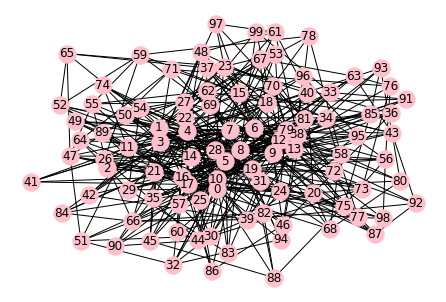

In [22]:
grafica_red(RedAleatoria,"RedAleatoriaBarbAlbert")

### ACTIVIDAD 9
Llama a la función para graficar las distribucion de grados de la red Barabasi-Albert

[0, 0, 0, 0, 0, 25, 19, 15, 5, 8, 7, 2, 1, 2, 0, 1, 0, 1, 3, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1]


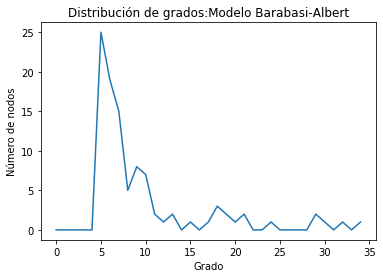

In [23]:
distGradosAleatoria = grafica_distribucion_grados(RedAleatoria,"Modelo Barabasi-Albert")

### ACTIVIDAD 10
Llama a la información para cálcular el grado promedio de la red Barabasi-Albert

In [24]:
grado_promedio(RedAleatoria,distGradosAleatoria)

Grado promedio del grafo: 9.5


9.5

### ACTIVIDAD 11
Llama a la función para gráficar el mapa de calor de la red Barabasi-Albert

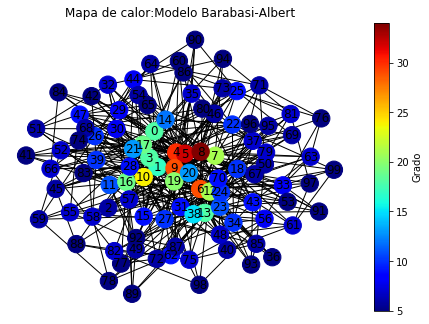

<Figure size 432x288 with 0 Axes>

In [25]:
mapa_calor_grado(RedAleatoria,"Modelo Barabasi-Albert")

## Red aleatoria Erdös–Rényi (Gilbert)
### ACTIVIDAD 12
Creamos una red aleatoria con el modelo Erdős–Rényi (implementado con el algoritmo de Gilbert) y con parámteros n=100 y p=0.1. Eso quiere decir que la red tendrá n=100 y cada par de nodos se conectara con probabilidad p=0.1

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph

In [26]:
def CreaAleatoriaGilbert(n, p):
    Red = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
    return Red

### ACTIVIDAD 13
Llama a la función para imprimir información de la red aleatoria Erdös-Rényi

In [27]:
RedAleatoriaGilbert = CreaAleatoriaGilbert(100, 0.1)
imprime_informacion(RedAleatoriaGilbert)

Informacion de la red: 
- nodos		= 100
- enlaces	= 490
- diámetro	= 4
- densidad	= 0.099


### ACTIVIDAD 14
Llamamos a la función que gráfica a la red aleatoria Erdös-Rényi

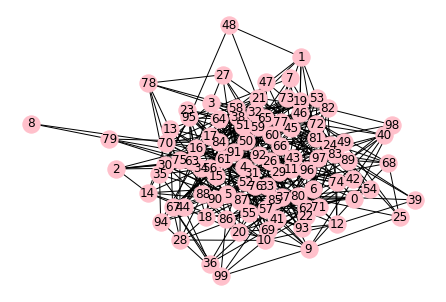

In [28]:
grafica_red(RedAleatoriaGilbert,"RedAleatoriaGilbert")

### ACTIVIDAD 15
Llama a la función para graficar las distribucion de grados de la red aleatoria Erdös-Rényi

[0, 0, 1, 1, 1, 3, 9, 5, 8, 18, 18, 12, 11, 6, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]


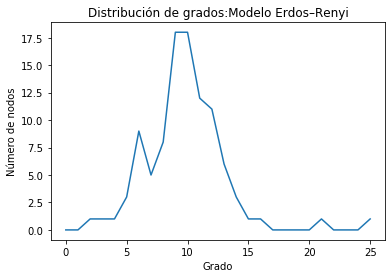

In [29]:
distGradosGilbert = grafica_distribucion_grados(RedAleatoriaGilbert,"Modelo Erdos–Renyi")

### ACTIVIDAD 16
Llama a la información para cálcular el grado promedio de la red aleatoria Erdös-Rényi

In [30]:
grado_promedio(RedAleatoriaGilbert,distGradosGilbert)

Grado promedio del grafo: 9.8


9.8

### ACTIVIDAD 17
Llama a la función para gráficar el mapa de calor de la red aleatoria Erdös-Rényi

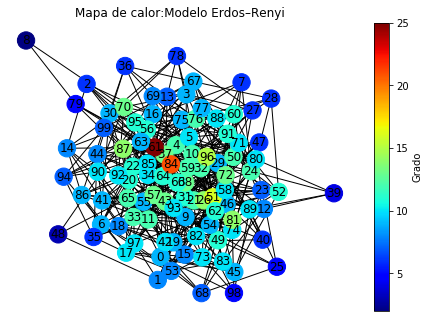

<Figure size 432x288 with 0 Axes>

In [31]:
mapa_calor_grado(RedAleatoriaGilbert,"Modelo Erdos–Renyi")

## Red aleatoria Watts-Strogatz
### ACTIVIDAD 18
Creamos una red aleatoria con el modelo Watts-Strogatz (implementado con el algoritmo de Gilbert) y con parámteros n=100, k=8, p=0.0.5. Eso quiere decir que la red tendrá n=100 inicialmente conectados a si 8 vecinos más cercanos en un anillo. Durante la ejecución del algoritmo, cada enlace se reconectará con probabilidad p=0.01

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

In [32]:
def CreaRedAleatoriaWattsStrog(n, k, p):
    return nx.watts_strogatz_graph(n, k, p, seed=None)

### ACTIVIDAD 19
Llama a la función para imprimir información de la red aleatoria Watts-Strogatz

In [33]:
RedAleatoriaWS = CreaRedAleatoriaWattsStrog(100, 8, 0.05)
imprime_informacion(RedAleatoriaWS)

Informacion de la red: 
- nodos		= 100
- enlaces	= 400
- diámetro	= 7
- densidad	= 0.081


### ACTIVIDAD 20
Llamamos a la función que gráfica la red aleatoria Watts-Strogatz

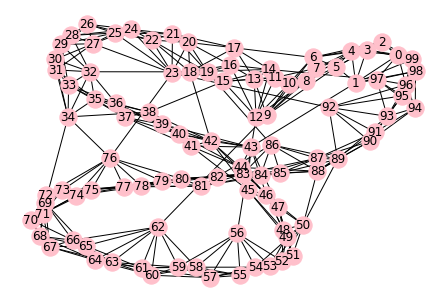

In [34]:
grafica_red(RedAleatoriaWS,"RedAleatoriaWS")

### ACTIVIDAD 21
Llama a la función para graficar las distribucion de grados de la red aleatoria Watts-Strogatz

[0, 0, 0, 0, 0, 0, 0, 15, 72, 11, 2]


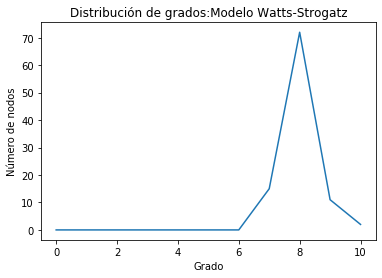

In [35]:
dist_gradosWS = grafica_distribucion_grados(RedAleatoriaWS,"Modelo Watts-Strogatz")

### ACTIVIDAD 22
Llama a la información para cálcular el grado promedio de la red aleatoria Watts-Strogatz

In [36]:
grado_promedio(RedAleatoriaWS,dist_gradosWS)

Grado promedio del grafo: 8.0


8.0

### ACTIVIDAD 23
Llama a la función para gráficar el mapa de calor de la red aleatoria Watts-Strogatz

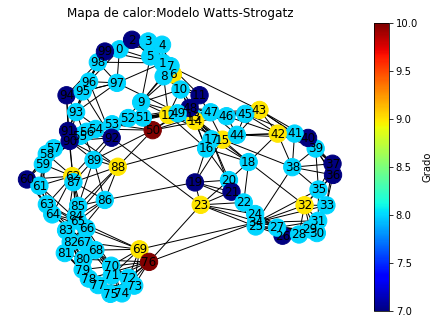

<Figure size 432x288 with 0 Axes>

In [37]:
mapa_calor_grado(RedAleatoriaWS,"Modelo Watts-Strogatz")

# Análisis de la distribucion de grado de la red aleatoria Watts-Strogatz

### ACTIVIDAD 24
Cree 9 redes con el modelo Watts-Strogatz y los parámetros n=100, k=8, tomando los siguientes valores de p = 0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1. Para cada red obtenga su gráfica de distribucion de probabilidad y mapa de calor de grado

[0, 0, 0, 0, 0, 0, 0, 0, 100]


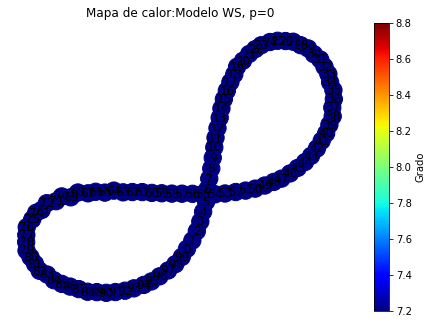

[0, 0, 0, 0, 0, 0, 0, 3, 94, 3]


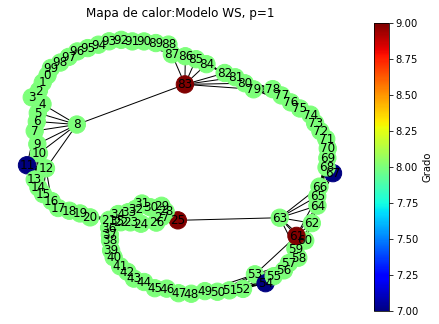

[0, 0, 0, 0, 0, 0, 1, 10, 78, 10, 1]


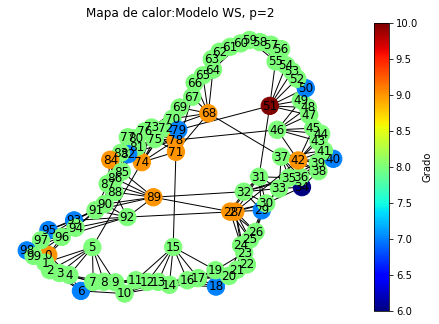

[0, 0, 0, 0, 0, 0, 5, 20, 49, 22, 4]


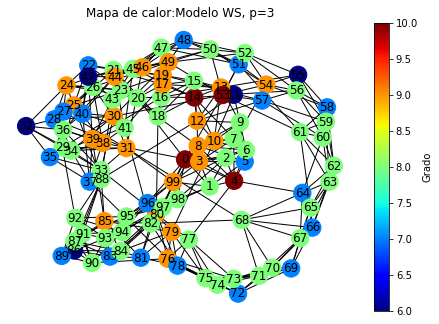

[0, 0, 0, 0, 1, 0, 14, 22, 25, 24, 12, 2]


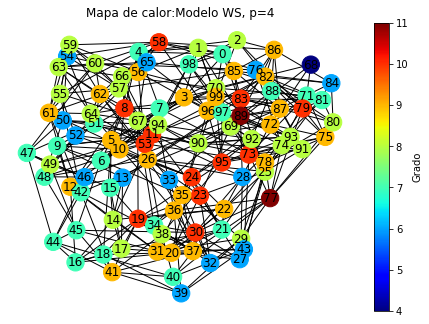

[0, 0, 0, 0, 1, 4, 12, 27, 21, 17, 10, 4, 3, 0, 1]


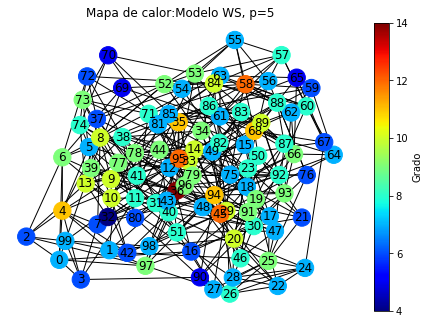

[0, 0, 0, 0, 3, 2, 19, 21, 18, 14, 13, 5, 3, 2]


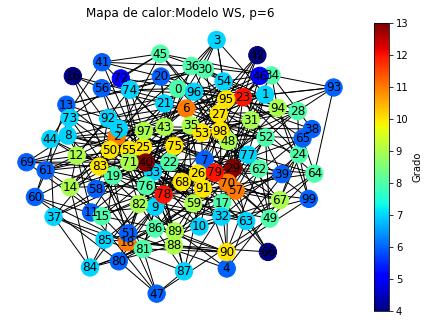

[0, 0, 0, 0, 1, 7, 15, 20, 18, 19, 11, 3, 5, 1]


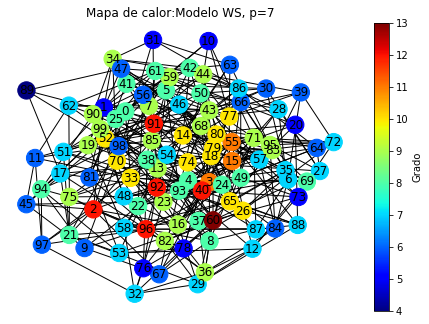

[0, 0, 0, 0, 2, 7, 18, 19, 18, 16, 8, 6, 1, 2, 1, 2]


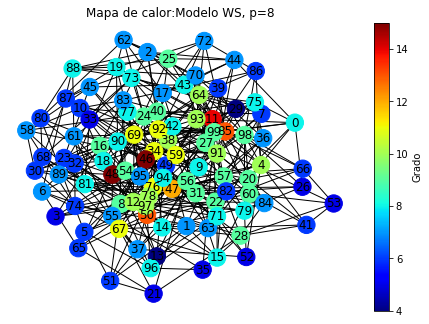

<Figure size 432x288 with 0 Axes>

In [38]:
probabilidades = [0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
n1 = 100
k1 = 8
for i in range(0,len(probabilidades)):
        Red = CreaRedAleatoriaWattsStrog(n1, k1, probabilidades[i])
        grafica_distribucion_grados(Red,"Modelo WS, p=" + str(i))
        plt.clf()
        mapa_calor_grado(Red,"Modelo WS, p=" + str(i))
        